<a href="https://colab.research.google.com/github/IvanFP26/MachineLearning/blob/main/Week6/K_Means_Clustering_using_Mall_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#Nama : Ivan Fernanda Prayoga
#NIM : 1103204035
#K-Means Clustering using Mall Customers

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import pandas as pd

# Ganti path dengan lokasi dataset di Google Drive
file_path = '/content/drive/MyDrive/Machine Learning/Mall_Customers.csv'

# Membaca dataset dan mengubahnya menjadi DataFrame
df = pd.read_csv(file_path)

# Menampilkan DataFrame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Mengubah nama atribut/kolom
df = df.rename(columns={'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score'})

# Menampilkan DataFrame
print(df.head())

   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [14]:
# Menghapus kolom "CustomerID" dan "Gender"
df = df.drop(['CustomerID', 'Gender'], axis=1)

# Menampilkan DataFrame
print(df.head())

   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

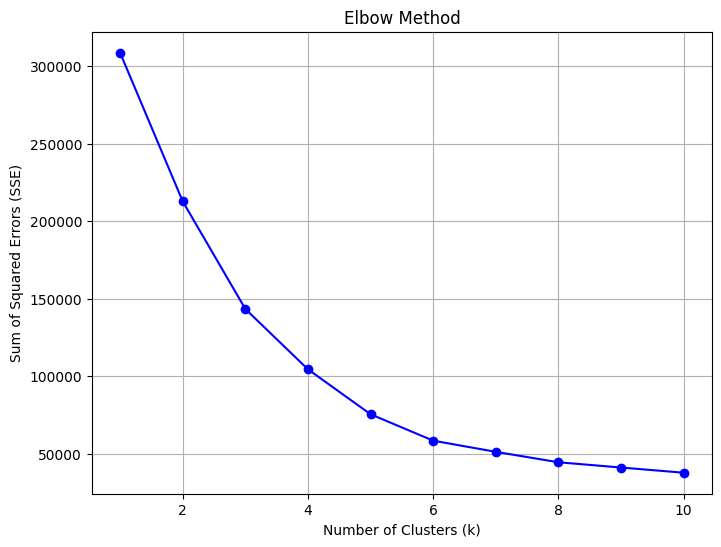

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil kolom yang akan digunakan untuk klastering
data = df[['Age', 'Annual Income', 'Spending Score']]

# Menyimpan nilai SSE (Sum of Squared Errors) untuk berbagai jumlah kluster (k) dari 1 hingga 10
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Membuat plot elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


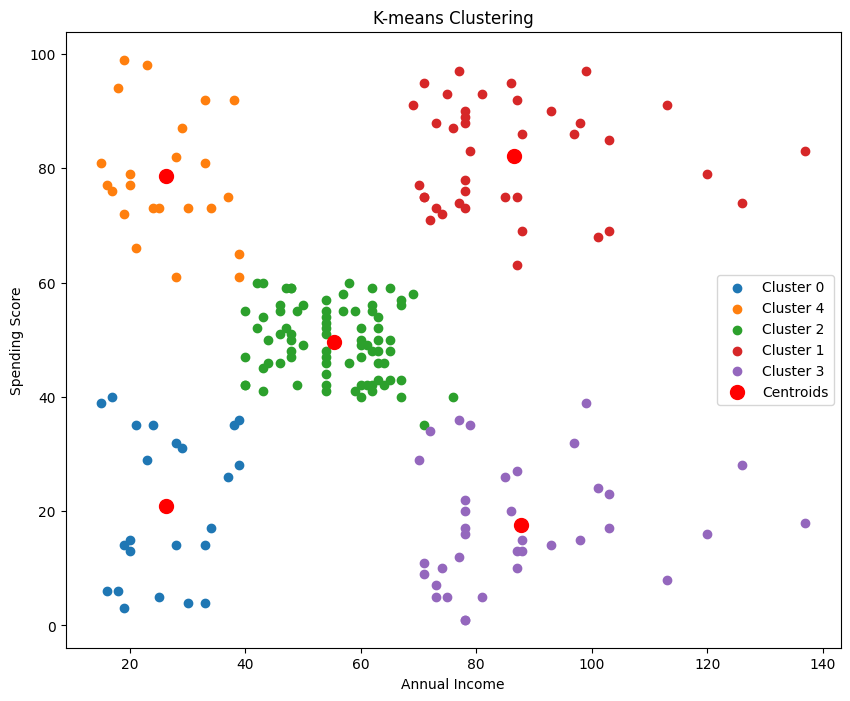

In [16]:
kmeans = KMeans(n_clusters=5, random_state=0)
df['label'] = kmeans.fit_predict(data)

# Visualisasi hasil klastering
plt.figure(figsize=(10, 8))

# Menggunakan scatter plot untuk memvisualisasikan data dalam setiap kluster
for label in df['label'].unique():
    cluster_data = df[df['label'] == label]
    plt.scatter(cluster_data['Annual Income'], cluster_data['Spending Score'], label=f'Cluster {label}')

# Menambahkan centroid kluster
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=100, c='red', label='Centroids')

plt.title('K-means Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import silhouette_score

# Inisialisasi dictionary untuk menyimpan nilai Silhouette Score
silhouette_scores = {}

# Menghitung Silhouette Score untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, labels)
    silhouette_scores[k] = silhouette_avg

# Menampilkan nilai Silhouette Score untuk setiap nilai k
for k, silhouette_avg in silhouette_scores.items():
    print(f"Silhouette Score for k={k}: {silhouette_avg}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.293166070535953
Silhouette Score for k=3: 0.3839349967742105
Silhouette Score for k=4: 0.40546302077733304
Silhouette Score for k=5: 0.44428597560893024
Silhouette Score for k=6: 0.4523443947724053
Silhouette Score for k=7: 0.4412807576186172
Silhouette Score for k=8: 0.4280971079746162
Silhouette Score for k=9: 0.40126260157691634
Silhouette Score for k=10: 0.3790978814868016


In [18]:
from sklearn.metrics import davies_bouldin_score

# Inisialisasi dictionary untuk menyimpan nilai Davies-Bouldin Index
dbi_scores = {}

# Menghitung Davies-Bouldin Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    dbi = davies_bouldin_score(data, labels)  # Menghitung Davies-Bouldin Index
    dbi_scores[k] = dbi

# Menampilkan nilai Davies-Bouldin Index untuk setiap nilai k
for k, dbi in dbi_scores.items():
    print(f"Davies-Bouldin Index for k={k}: {dbi}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Davies-Bouldin Index for k=2: 1.3571023143309133
Davies-Bouldin Index for k=3: 0.8748062648492879
Davies-Bouldin Index for k=4: 0.8914904209843165
Davies-Bouldin Index for k=5: 0.8218781633199781
Davies-Bouldin Index for k=6: 0.746974007275528
Davies-Bouldin Index for k=7: 0.7863764854525301
Davies-Bouldin Index for k=8: 0.8641438876447516
Davies-Bouldin Index for k=9: 0.9070119449899816
Davies-Bouldin Index for k=10: 0.9573604236246045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
from sklearn.metrics import calinski_harabasz_score

# Inisialisasi dictionary untuk menyimpan nilai Calinski-Harabasz Index
calinski_harabasz_scores = {}

# Menghitung Calinski-Harabasz Index untuk setiap nilai k dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)
    ch_score = calinski_harabasz_score(data, labels)
    calinski_harabasz_scores[k] = ch_score

# Menampilkan nilai Calinski-Harabasz Index untuk setiap nilai k
for k, ch_score in calinski_harabasz_scores.items():
    print(f"Calinski-Harabasz Index for k={k}: {ch_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Calinski-Harabasz Index for k=2: 89.28096999467428
Calinski-Harabasz Index for k=3: 113.70507138642179
Calinski-Harabasz Index for k=4: 127.9838294818919
Calinski-Harabasz Index for k=5: 151.04386000160667
Calinski-Harabasz Index for k=6: 166.7204931788687
Calinski-Harabasz Index for k=7: 162.2852042279988
Calinski-Harabasz Index for k=8: 163.58062876554533
Calinski-Harabasz Index for k=9: 156.15508760692356
Calinski-Harabasz Index for k=10: 152.26426170758603
